## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
import os


In [ ]:
# mount drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Image'


Mounted at /content/drive


## Import Images with Labels

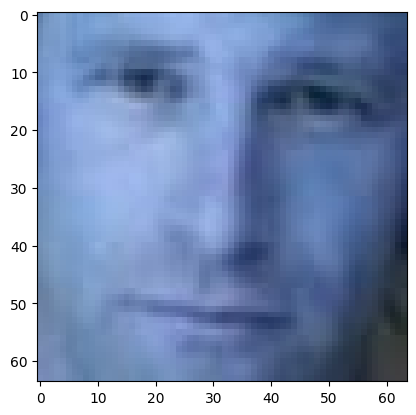

In [ ]:
# Seeing a random picture
img = cv.imread(folder_path+"/non_smile/Aaron_Eckhart_0001.jpg", 1)
#print(img)
plt.imshow(img)
plt.show()

Importing all images along with their labels. Also resizing the images into 64*64 pixels. Then flattened the 3 dimensional array into 1 dimensional. As ML models like SVC, RF takes 1D arrays as input.

In [ ]:
def read_images(dir,data,label):
  for file in os.listdir(dir):
    if file.endswith(".jpg"):
      image = np.array(cv.imread(dir+file,1))
      image = cv.resize(image, (64,64)).flatten()
      data['image'].append(image)
      data['label'].append(label)

def read_files(dir):
  data = {
      "image":[],
      'label':[]
  }
  dir_smile = dir + '/smile/'
  label = 1
  read_images(dir_smile, data, label)

  dir_non_smile = dir + '/non_smile/'
  label = 0
  read_images(dir_non_smile, data, label)

  return data
data = read_files(folder_path)

In [ ]:
print(len(data['image']))
print(data['image'][100].shape)
print(data['image'][0])
#print(data)

1203
(12288,)
[ 68 109 132 ...  43  70  90]


## Training model

Imported all necessary library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib
import pickle

In [ ]:
X = data['image']
y = data['label']

Spliting the data into train and validation set. Here y contains the target label and X contains the input features.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Machine

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

# Saving the model
with open(folder_path+'smile_svc.pkl','wb') as f:
    pickle.dump(svc,f)
# Importing the model
with open(folder_path+'smile_svc.pkl', 'rb') as f:
    svc2 = pickle.load(f)
# Predicting on Validation set
svc_predicted = svc2.predict(X_val)

In [ ]:
# Showing the accuracy
accuracy_score(y_val, svc_predicted)

0.8879668049792531

In [ ]:
# F1 Score
print(classification_report(y_val, svc_predicted, target_names=['non_smile','smile'], digits=4))

              precision    recall  f1-score   support

   non_smile     0.8450    0.9397    0.8898       116
       smile     0.9375    0.8400    0.8861       125

    accuracy                         0.8880       241
   macro avg     0.8912    0.8898    0.8879       241
weighted avg     0.8930    0.8880    0.8879       241



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X_train, y_train)

with open(folder_path+'smile_rfc.pkl','wb') as f:
    pickle.dump(rfc,f)
with open(folder_path+'smile_rfc.pkl', 'rb') as f:
    rfc2 = pickle.load(f)

In [ ]:
rfc_predicted = rfc2.predict(X_val)
accuracy_score(y_val, rfc_predicted)

0.8464730290456431

In [ ]:
print(classification_report(y_val, rfc_predicted, target_names=['non_smile','smile'], digits=4))

              precision    recall  f1-score   support

   non_smile     0.7842    0.9397    0.8549       116
       smile     0.9314    0.7600    0.8370       125

    accuracy                         0.8465       241
   macro avg     0.8578    0.8498    0.8460       241
weighted avg     0.8605    0.8465    0.8456       241

